In [1]:
import os
import sys; sys.path.insert(0, os.path.abspath("../"))
import cv2
import numpy as np 
import matplotlib.pyplot as plt
# from utils.plots import get_image, get_image_and_plot
from tqdm import tqdm
import pandas as pd
from scipy.stats import skew, kurtosis
from skimage.measure import shannon_entropy
from pipeline.preprocessing import SkinLesionPreprocessing
from dataset.dataset import SegExamples
from pipeline.feature_extraction import FeaturesExtraction
from tqdm import tqdm
import pyarrow

In [14]:
examples = SegExamples()
preproc = SkinLesionPreprocessing()
cfe = FeaturesExtraction(levels=['global'])

In [15]:
cfe.features_names

['global_rgb_mean_1',
 'global_rgb_mean_2',
 'global_rgb_mean_3',
 'global_rgb_std_1',
 'global_rgb_std_2',
 'global_rgb_std_3',
 'global_rgb_skew_1',
 'global_rgb_skew_2',
 'global_rgb_skew_3',
 'global_rgb_kur_1',
 'global_rgb_kur_2',
 'global_rgb_kur_3',
 'global_rgb_ent_1',
 'global_rgb_ent_2',
 'global_rgb_ent_3',
 'global_lab_mean_1',
 'global_lab_mean_2',
 'global_lab_mean_3',
 'global_lab_std_1',
 'global_lab_std_2',
 'global_lab_std_3',
 'global_lab_skew_1',
 'global_lab_skew_2',
 'global_lab_skew_3',
 'global_lab_kur_1',
 'global_lab_kur_2',
 'global_lab_kur_3',
 'global_lab_ent_1',
 'global_lab_ent_2',
 'global_lab_ent_3',
 'global_ycrbcb_mean_1',
 'global_ycrbcb_mean_2',
 'global_ycrbcb_mean_3',
 'global_ycrbcb_std_1',
 'global_ycrbcb_std_2',
 'global_ycrbcb_std_3',
 'global_ycrbcb_skew_1',
 'global_ycrbcb_skew_2',
 'global_ycrbcb_skew_3',
 'global_ycrbcb_kur_1',
 'global_ycrbcb_kur_2',
 'global_ycrbcb_kur_3',
 'global_ycrbcb_ent_1',
 'global_ycrbcb_ent_2',
 'global_ycrbcb_

In [9]:
examples[0]['problem']

'binary'

In [13]:
# get features example
all_feat = []
labels = []

for i in tqdm(range(examples.seg_examples_df.shape[0]-67)): #

    if examples[i]['problem'] != 'binary':
        continue

    labels.append(examples[i]['label'])
    
    image = examples[i]['img']

    image = preproc.preprocess(image)

    all_feat.append(cfe.extract_features(image))

df = pd.DataFrame(all_feat, columns=cfe.features_names)

df['label'] = labels
df

100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


,global_rgb_mean_1,global_rgb_mean_2,global_rgb_mean_3,global_rgb_std_1,global_rgb_std_2,global_rgb_std_3,global_rgb_skew_1,global_rgb_skew_2,global_rgb_skew_3,global_rgb_kur_1,...,global_hsv_skew_1,global_hsv_skew_2,global_hsv_skew_3,global_hsv_kur_1,global_hsv_kur_2,global_hsv_kur_3,global_hsv_ent_1,global_hsv_ent_2,global_hsv_ent_3,label
0,152.992157,123.149544,142.79808,40.043137,38.584644,41.395874,-2.392021,-2.102249,-2.117684,4.311297,...,-1.094994,2.158256,-2.390699,50.168835,3.527214,4.306688,4.140778,5.661916,5.600688,nevus


In [21]:
df.to_feather('../data/binary/seg_examples_feat.f')


### Local features

In [13]:
cfe_l = FeaturesExtraction(levels=['global', 'local'])

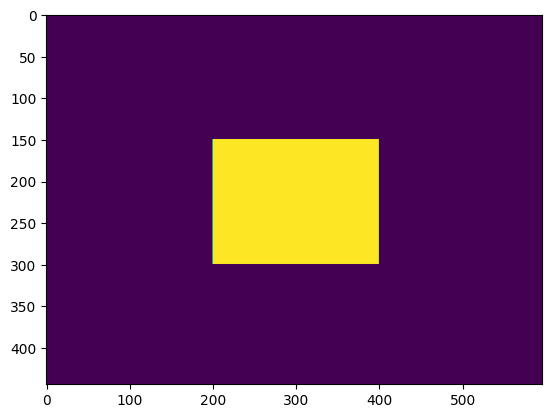

In [14]:
eximg = examples[0]['img']
eximg = preproc.preprocess(eximg)
mask = np.zeros(eximg.shape[:2])
mask[150:300,200:400] = 1
plt.imshow(mask)

In [15]:
results = cfe_l.extract_features(eximg, mask)

In [16]:
cfe_l.features_names

['global_rgb_mean_1',
 'global_rgb_mean_2',
 'global_rgb_mean_3',
 'global_rgb_std_1',
 'global_rgb_std_2',
 'global_rgb_std_3',
 'global_rgb_skew_1',
 'global_rgb_skew_2',
 'global_rgb_skew_3',
 'global_rgb_kur_1',
 'global_rgb_kur_2',
 'global_rgb_kur_3',
 'global_rgb_ent_1',
 'global_rgb_ent_2',
 'global_rgb_ent_3',
 'global_lab_mean_1',
 'global_lab_mean_2',
 'global_lab_mean_3',
 'global_lab_std_1',
 'global_lab_std_2',
 'global_lab_std_3',
 'global_lab_skew_1',
 'global_lab_skew_2',
 'global_lab_skew_3',
 'global_lab_kur_1',
 'global_lab_kur_2',
 'global_lab_kur_3',
 'global_lab_ent_1',
 'global_lab_ent_2',
 'global_lab_ent_3',
 'global_ycrbcb_mean_1',
 'global_ycrbcb_mean_2',
 'global_ycrbcb_mean_3',
 'global_ycrbcb_std_1',
 'global_ycrbcb_std_2',
 'global_ycrbcb_std_3',
 'global_ycrbcb_skew_1',
 'global_ycrbcb_skew_2',
 'global_ycrbcb_skew_3',
 'global_ycrbcb_kur_1',
 'global_ycrbcb_kur_2',
 'global_ycrbcb_kur_3',
 'global_ycrbcb_ent_1',
 'global_ycrbcb_ent_2',
 'global_ycrbcb_

In [17]:
results

[152.99216,
 123.14954,
 142.79808,
 40.043137,
 38.584644,
 41.395874,
 -2.3920210110772273,
 -2.1022494044014106,
 -2.1176841482676494,
 4.311297487788059,
 2.99116593975907,
 3.063140447608066,
 5.593805089478174,
 5.819141683528445,
 5.946027056430908,
 139.21397,
 143.0175,
 121.91823,
 41.786793,
 3.0324836,
 2.3932114,
 -2.2507767450073994,
 0.271861553835755,
 1.514732374436933,
 3.6215065749963147,
 2.0247052590979377,
 3.666464152624198,
 5.7347871462255,
 3.4439952694161082,
 2.9755901480405966,
 134.31432,
 141.35799,
 132.7455,
 39.20566,
 3.4016266,
 2.045807,
 -2.19566339734579,
 0.5259390308102352,
 -1.2462580082815111,
 3.3877678880328075,
 1.6976016348715532,
 2.8161429335575887,
 5.754950483895106,
 3.653975752306781,
 2.9039445090852456,
 159.47516,
 57.346497,
 153.01717,
 4.9109454,
 30.875774,
 40.02608,
 -1.094993545873534,
 2.1582560089925438,
 -2.3906992002758227,
 50.16883493133584,
 3.5272144816590227,
 4.306687746109292,
 4.140778003045017,
 5.6619155069085